In [ ]:
import sys
sys.path.append('..')

from src.core import ECGData
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load multi-channel ECG data
# The code now supports multi-channel CSV format!
Holter = ECGData('../data/csv/holter/full_ecg_data.csv')

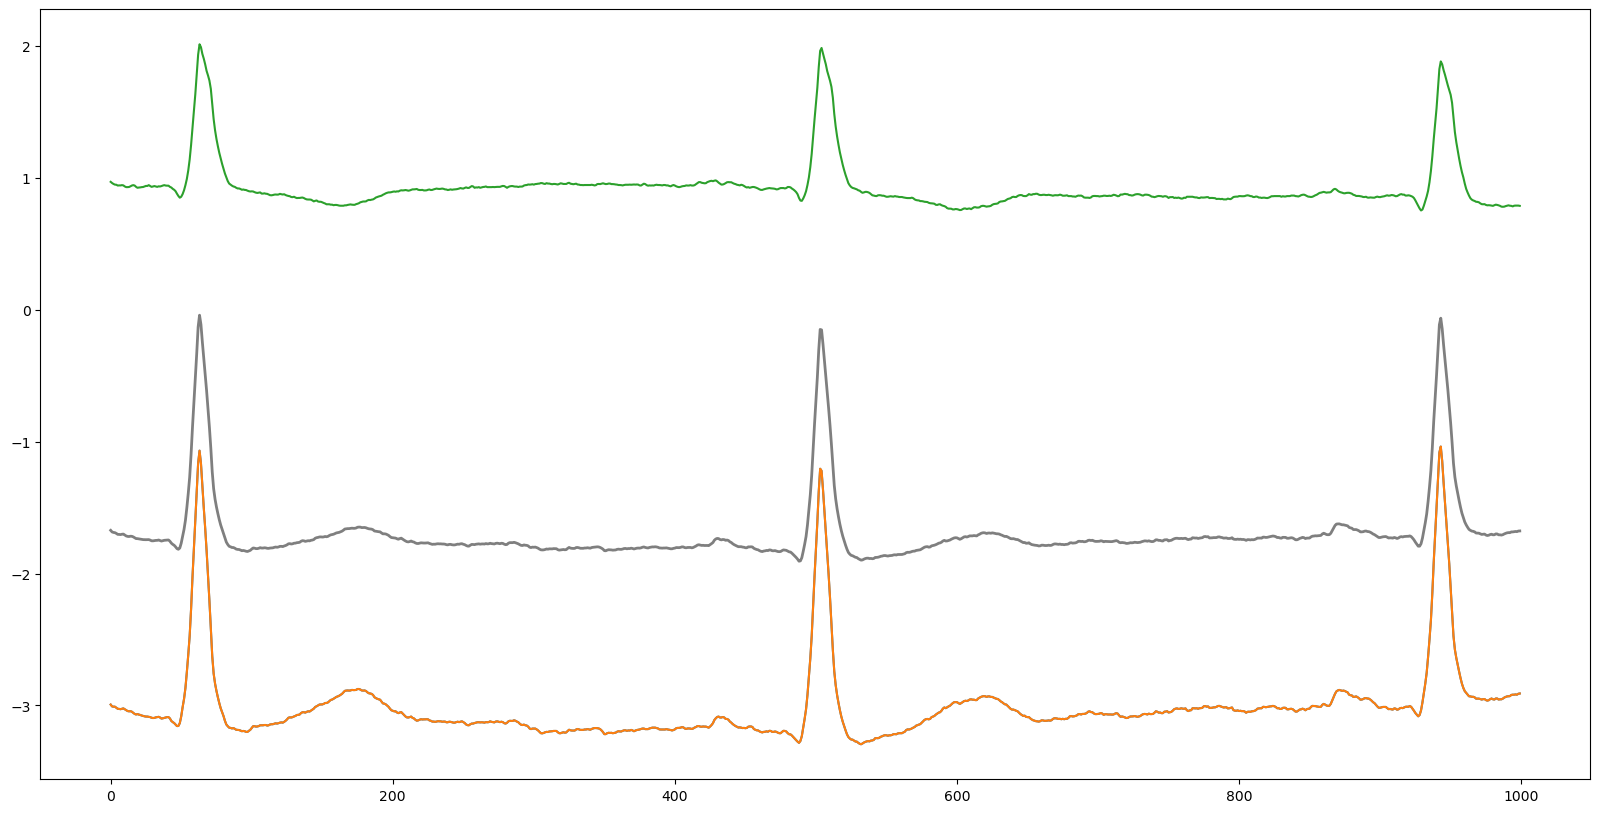

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(Holter.lead_2.signal[1000:2000])
plt.plot(Holter.lead_2.signal[1000:2000])
plt.plot(Holter.lead_3.signal[1000:2000])
plt.plot((Holter.lead_2.signal[1000:2000] + Holter.lead_2.signal[1000:2000] + Holter.lead_3.signal[1000:2000])/3, 'k', linewidth=2, alpha=0.5,label='Mean Signal')

In [ ]:
signal_average = 1000*(Holter.lead_2.signal + Holter.lead_2.signal + Holter.lead_3.signal)/3

In [ ]:
from src.core import ECGLead
signal_average = ECGLead(lead=4, signal=signal_average, fs=Holter.fs, units='mV')

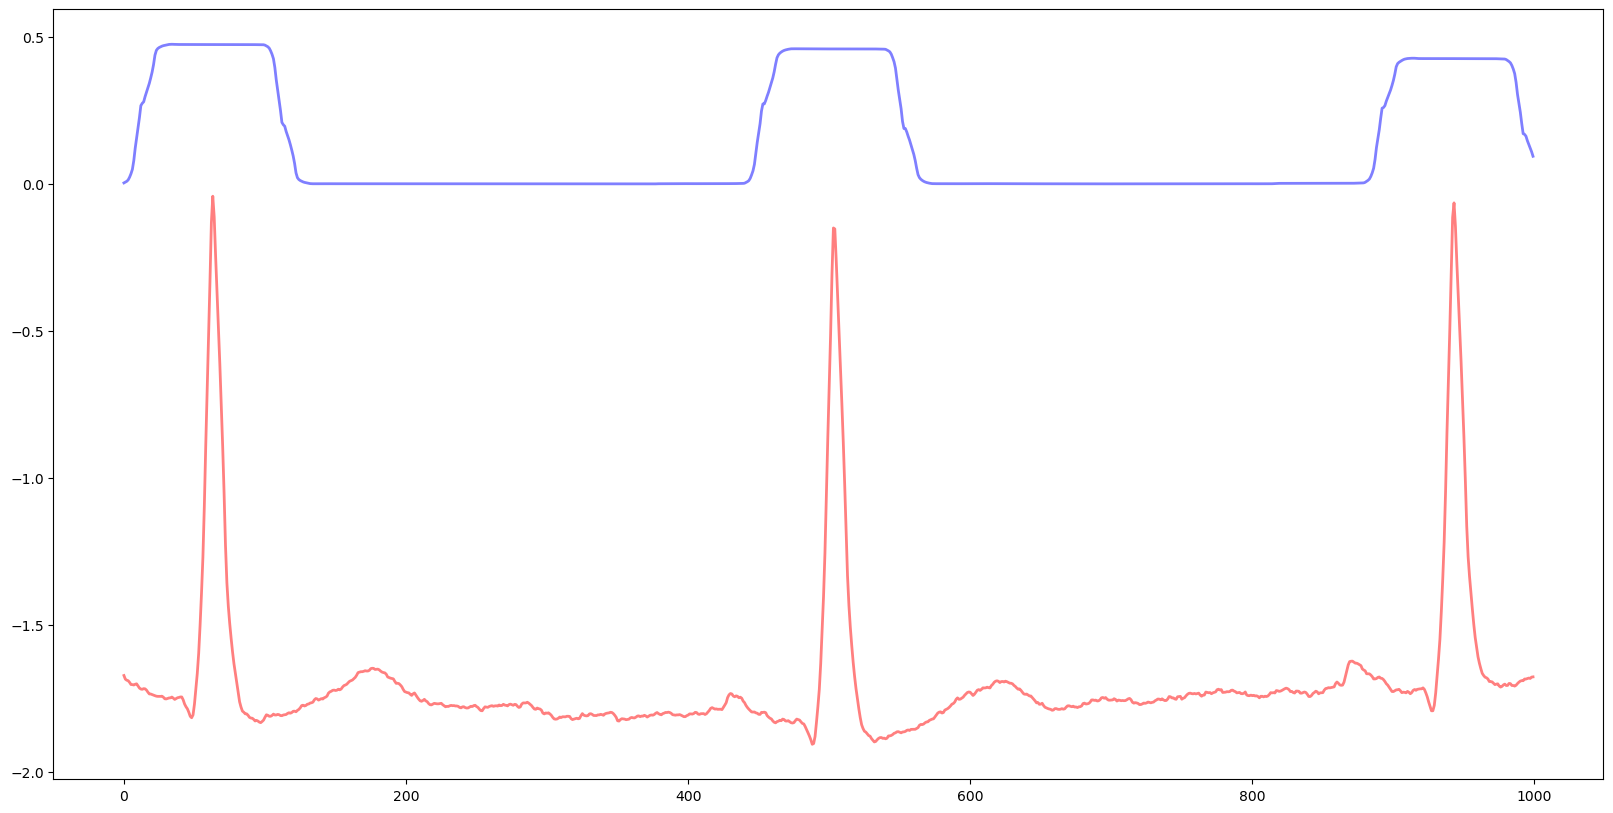

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(signal_average.signal[1000:2000], 'r', linewidth=2, alpha=0.5,label='Mean Signal')
plt.plot(signal_average.window[1000:2000], 'b', linewidth=2, alpha=0.5,label='Mean Signal')

/Users/kevindejbod/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kevindejbod/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kevindejbod/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kevindejbod/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: >

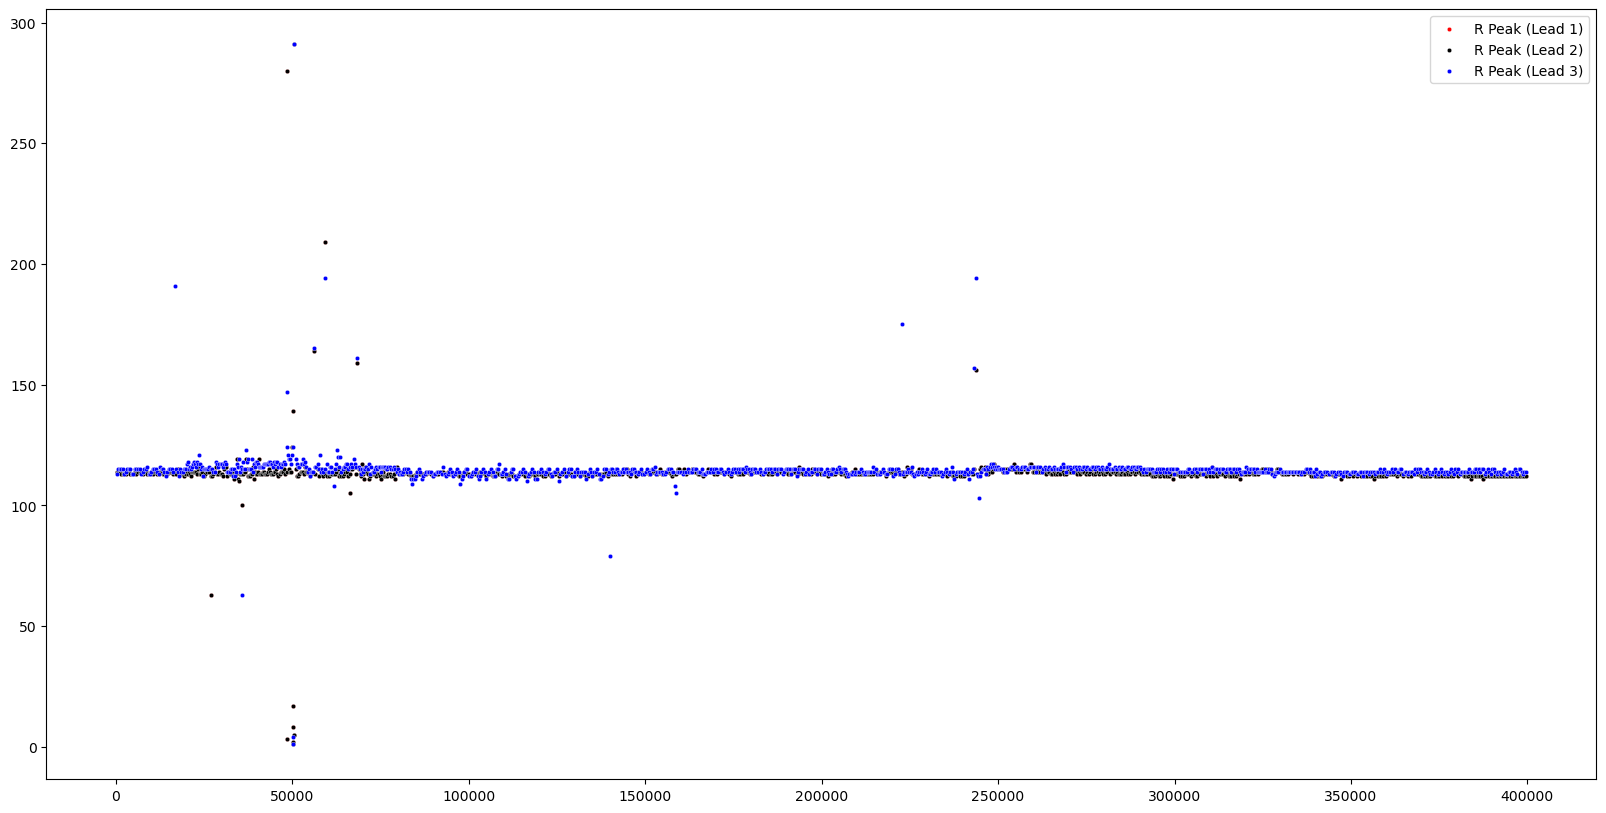

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=Holter.lead_2.r_peaks[:,0], y=Holter.lead_2.r_peaks[:,1], s=10, c='r', marker='o', label='R Peak (Lead 1)')
sns.scatterplot(x=Holter.lead_2.r_peaks[:,0], y=Holter.lead_2.r_peaks[:,1], s=10, c='k', marker='o', label='R Peak (Lead 2)')
sns.scatterplot(x=Holter.lead_3.r_peaks[:,0], y=Holter.lead_3.r_peaks[:,1], s=10, c='b', marker='o', label='R Peak (Lead 3)')

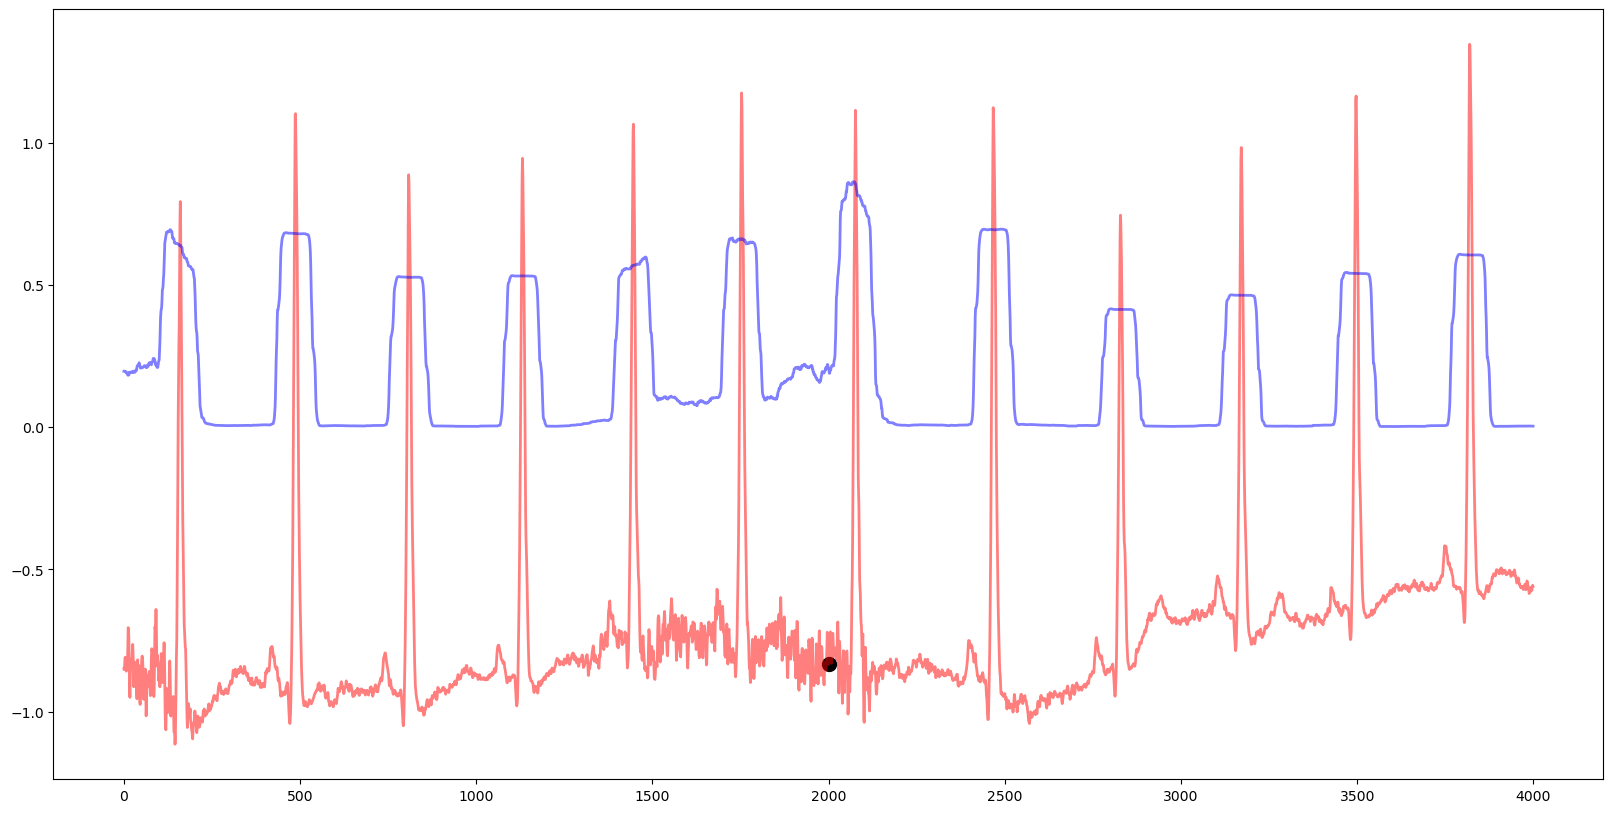

In [ ]:
noise = Holter.lead_2.r_peaks[:,0][np.argmax(Holter.lead_2.r_peaks[:,1])]
t = noise
plt.figure(figsize=(20,10))
plt.plot(Holter.lead_2.signal[t-2000:t+2000], 'r', linewidth=2, alpha=0.5,label='Mean Signal')
plt.plot(Holter.lead_2.window[t-2000:t+2000], 'b', linewidth=2, alpha=0.5,label='Mean Signal')
plt.scatter(2000, Holter.lead_2.signal[t], s=100, c='k', marker='o', label='R Peak')

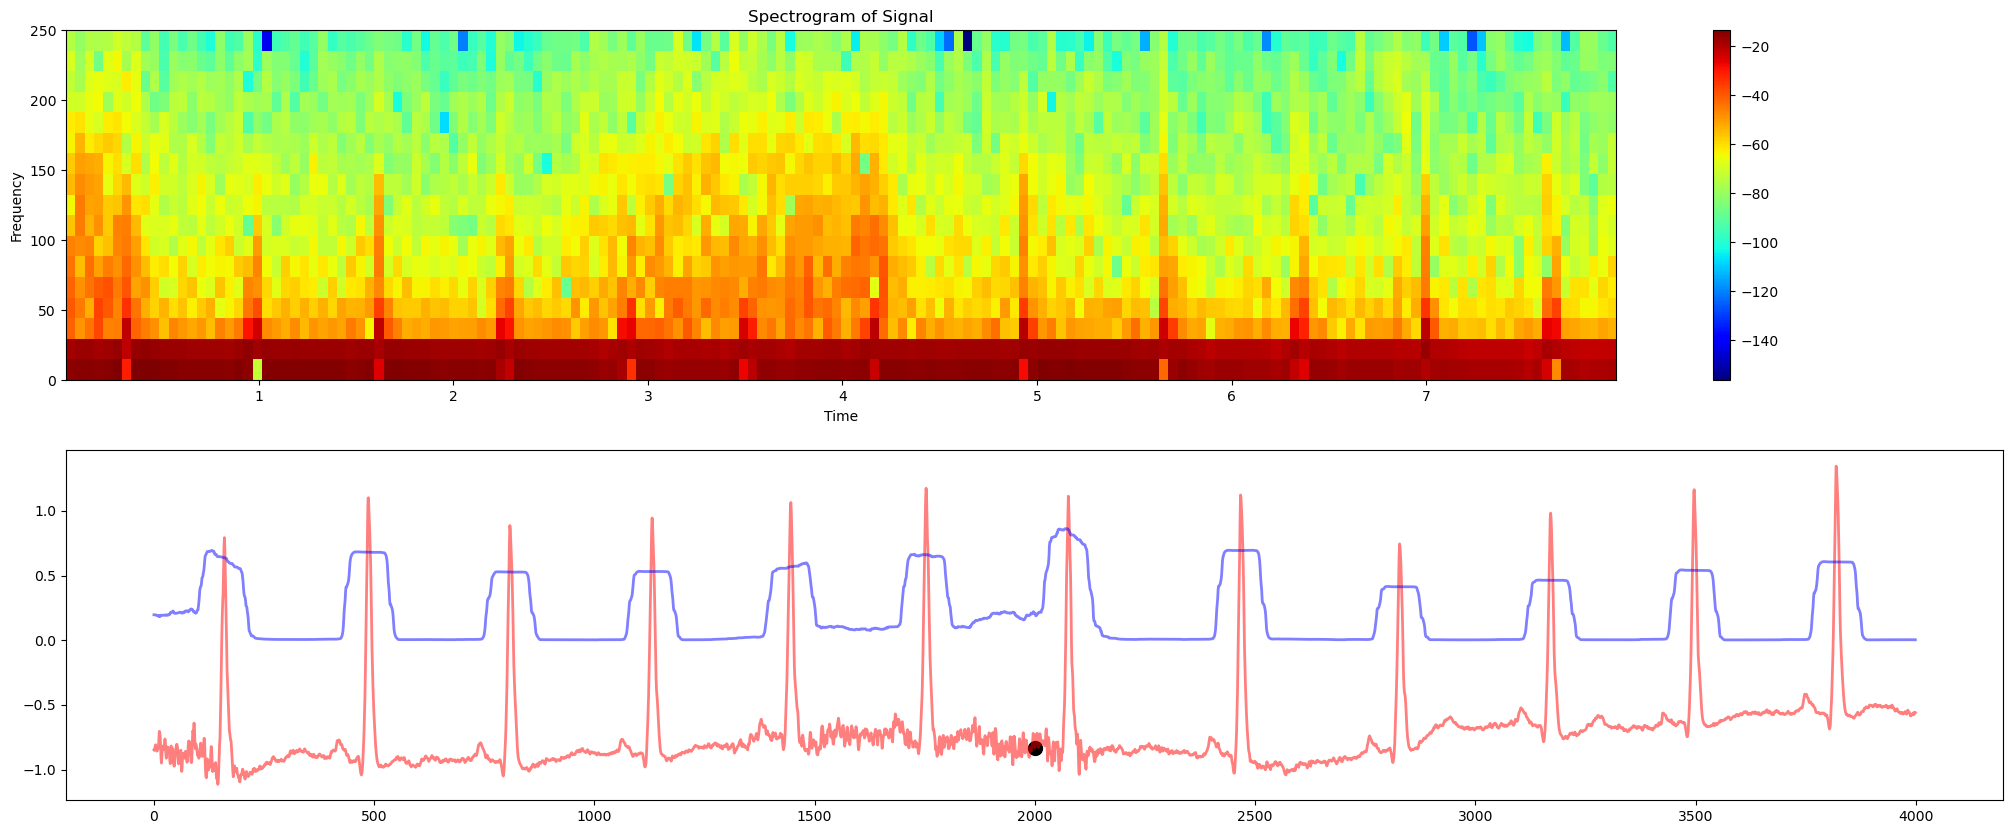

In [ ]:
noise = Holter.lead_2.r_peaks[:,0][np.argmax(Holter.lead_2.r_peaks[:,1])]
t = noise
plt.figure(figsize=(25, 10))

# First subplot
plt.subplot(2, 1, 1)
plt.specgram(Holter.lead_2.signal[t-2000:t+2000], Fs=Holter.fs, NFFT=32, noverlap=8, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Spectrogram of Signal')

plt.subplot(2, 1, 2)
plt.plot(Holter.lead_2.signal[t-2000:t+2000], 'r', linewidth=2, alpha=0.5,label='Mean Signal')
plt.plot(Holter.lead_2.window[t-2000:t+2000], 'b', linewidth=2, alpha=0.5,label='Mean Signal')
plt.scatter(2000, Holter.lead_2.signal[t], s=100, c='k', marker='o', label='R Peak')

plt.show()
